In [1]:
%matplotlib inline

语料
=====
if this script cannot run, please download $nltk$ and its "brown" model

In [2]:
import nltk

try:
    sentences = nltk.corpus.brown.sents()
except:
    nltk.download('brown')
    sentences = nltk.corpus.brown.sents()
    
print('Sentence example:', sentences[0])

# or use our own sentences materials
# sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]


Sentence example: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


training log
=====

In [3]:
import logging

# training log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


training
====
use gensim to train a word embedding

In [4]:
import os
from gensim.models import Word2Vec

fname = 'brown_skipgram.model'
if os.path.exists(fname):
    # load the file if it has already been trained, to save repeating the slow training step below
    model = Word2Vec.load(fname)
else:
    # size: embedding vector size
    # window: skip-gram/CBOW model word window
    # min_count: target word size
    # workers: threads number
    # iter: training episodes
    model = Word2Vec(size=10, \
                     window=5, \
                     min_count=1, \
                     workers=4, \
                     iter=50)
    model.build_vocab(sentences)  # load sentences
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)  # training
    model.save(fname)
print('embedding vector for %s is %s' % (sentences[0][0], model.wv['say']))
# save embedding vectors

2018-07-06 17:58:04,425 : INFO : 'pattern' package not found; tag filters are not available for English
2018-07-06 17:58:04,429 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-07-06 17:58:04,430 : INFO : collecting all words and their counts
2018-07-06 17:58:04,435 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-06 17:58:05,132 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2018-07-06 17:58:05,738 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2018-07-06 17:58:06,383 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2018-07-06 17:58:06,975 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2018-07-06 17:58:07,471 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2018-07-06 17:58:07,859 : INFO : collected 56057 word type

2018-07-06 17:58:38,938 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 17:58:38,941 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-07-06 17:58:38,941 : INFO : EPOCH - 7 : training on 1161192 raw words (854265 effective words) took 4.5s, 190538 effective words/s
2018-07-06 17:58:39,946 : INFO : EPOCH 8 - PROGRESS: at 20.81% examples, 192340 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:58:40,963 : INFO : EPOCH 8 - PROGRESS: at 43.73% examples, 200620 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:58:41,984 : INFO : EPOCH 8 - PROGRESS: at 65.57% examples, 205555 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:58:43,002 : INFO : EPOCH 8 - PROGRESS: at 92.39% examples, 197436 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:58:43,261 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 17:58:43,263 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-07-06 17:58:43,266 : INFO : worker thread f

2018-07-06 17:59:16,481 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 17:59:16,482 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-07-06 17:59:16,482 : INFO : EPOCH - 16 : training on 1161192 raw words (853942 effective words) took 4.1s, 208295 effective words/s
2018-07-06 17:59:17,519 : INFO : EPOCH 17 - PROGRESS: at 21.75% examples, 193979 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:18,535 : INFO : EPOCH 17 - PROGRESS: at 44.52% examples, 201202 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:19,554 : INFO : EPOCH 17 - PROGRESS: at 66.39% examples, 206061 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:20,559 : INFO : EPOCH 17 - PROGRESS: at 94.58% examples, 200281 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:20,742 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 17:59:20,744 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-07-06 17:59:20,745 : INFO : worker thr

2018-07-06 17:59:53,450 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 17:59:53,450 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-07-06 17:59:53,451 : INFO : EPOCH - 25 : training on 1161192 raw words (853477 effective words) took 4.0s, 213403 effective words/s
2018-07-06 17:59:54,495 : INFO : EPOCH 26 - PROGRESS: at 23.64% examples, 209313 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:55,513 : INFO : EPOCH 26 - PROGRESS: at 47.04% examples, 215914 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:56,547 : INFO : EPOCH 26 - PROGRESS: at 71.94% examples, 217276 words/s, in_qsize 0, out_qsize 0
2018-07-06 17:59:57,500 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 17:59:57,502 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-07-06 17:59:57,503 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 17:59:57,503 : INFO : worker thread finished; awaiting 

2018-07-06 18:00:31,506 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 18:00:31,509 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-07-06 18:00:31,511 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 18:00:31,515 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-07-06 18:00:31,516 : INFO : EPOCH - 34 : training on 1161192 raw words (854202 effective words) took 4.1s, 206426 effective words/s
2018-07-06 18:00:32,524 : INFO : EPOCH 35 - PROGRESS: at 22.82% examples, 206006 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:00:33,526 : INFO : EPOCH 35 - PROGRESS: at 45.87% examples, 212474 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:00:34,552 : INFO : EPOCH 35 - PROGRESS: at 69.81% examples, 215556 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:00:35,574 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 18:00:35,575 : INFO : worker thread finished; awaiting 

2018-07-06 18:01:07,364 : INFO : EPOCH 43 - PROGRESS: at 70.81% examples, 218022 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:01:08,381 : INFO : EPOCH 43 - PROGRESS: at 99.80% examples, 210471 words/s, in_qsize 3, out_qsize 1
2018-07-06 18:01:08,382 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-07-06 18:01:08,384 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-07-06 18:01:08,385 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-07-06 18:01:08,385 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-07-06 18:01:08,386 : INFO : EPOCH - 43 : training on 1161192 raw words (854502 effective words) took 4.1s, 210718 effective words/s
2018-07-06 18:01:09,428 : INFO : EPOCH 44 - PROGRESS: at 21.75% examples, 192383 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:01:10,448 : INFO : EPOCH 44 - PROGRESS: at 43.73% examples, 196621 words/s, in_qsize 0, out_qsize 0
2018-07-06 18:01:11,474 : INFO : EPOCH 44 -

embedding vector for The is [ 0.5874604 -5.565378  -5.8476725  2.955857   6.081185   2.645216
 -3.5344164  3.3754137 -3.7586222  2.3908165]


相似度矩阵
====

In [5]:
import numpy as np

word_list = "woman women man girl boy green blue did".split()
sim_matrix = np.zeros((len(word_list), len(word_list)))
for i in range(len(word_list)):
    for j in range(i, len(word_list)):
        sim_matrix[i, j] = sim_matrix[j, i] = model.similarity(word_list[i], word_list[j])
        print('similarity(%s, %s) = %.6f' % \
              (word_list[i], word_list[j], sim_matrix[i, j]))


similarity(woman, woman) = 1.000000
similarity(woman, women) = 0.349410
similarity(woman, man) = 0.853376
similarity(woman, girl) = 0.988754
similarity(woman, boy) = 0.945583
similarity(woman, green) = 0.371792
similarity(woman, blue) = 0.327033
similarity(woman, did) = -0.050736
similarity(women, women) = 1.000000
similarity(women, man) = 0.259965
similarity(women, girl) = 0.282517
similarity(women, boy) = 0.264591
similarity(women, green) = 0.173586
similarity(women, blue) = 0.052181
similarity(women, did) = 0.079990
similarity(man, man) = 1.000000
similarity(man, girl) = 0.882205
similarity(man, boy) = 0.837474
similarity(man, green) = 0.153492
similarity(man, blue) = 0.180715
similarity(man, did) = -0.147200
similarity(girl, girl) = 1.000000
similarity(girl, boy) = 0.975206
similarity(girl, green) = 0.348907
similarity(girl, blue) = 0.334178
similarity(girl, did) = -0.113543
similarity(boy, boy) = 1.000000
similarity(boy, green) = 0.329442
similarity(boy, blue) = 0.342305
similarit

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys


可视化相似度矩阵
=====

[Text(0,0,''),
 Text(0,0,'woman'),
 Text(0,0,'women'),
 Text(0,0,'man'),
 Text(0,0,'girl'),
 Text(0,0,'boy'),
 Text(0,0,'green'),
 Text(0,0,'blue'),
 Text(0,0,'did')]

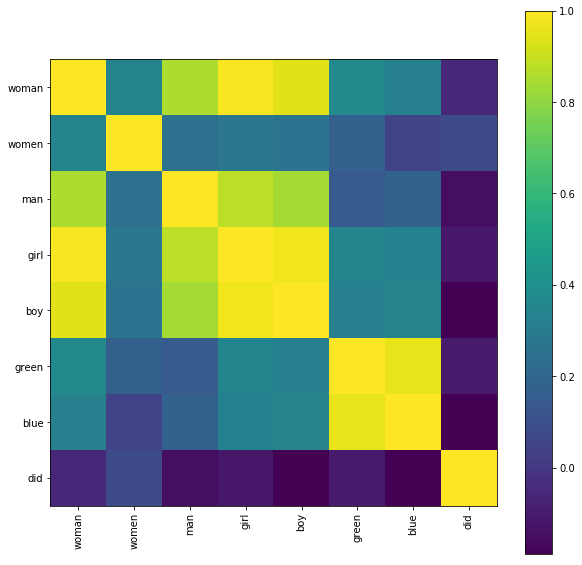

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(sim_matrix, interpolation='nearest')
plt.colorbar()

ax = plt.gca()
ax.set_xticklabels([''] + word_list, rotation=90)
ax.set_yticklabels([''] + word_list)